#### Importando bibliotecas

In [2]:
import pandas as pd
from pathlib import Path
import pyarrow.parquet as pq
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#### Pipeline de leitura das bases

In [3]:
base_path = Path(r"C:\Git\Projetos-Reposito-DA\Projeto1_Cohort_Empresas_BR\dados_projeto_1")

In [4]:
df_empresas = pd.read_parquet(base_path / "empresa_tratado.parquet")

print("📦 df_empresas")
print(f"Linhas: {len(df_empresas):,}")
print(f"Colunas ({len(df_empresas.columns)}):")
for col in df_empresas.columns:
    print(f" - {col}")

📦 df_empresas
Linhas: 65,696,874
Colunas (7):
 - cnpj_basico
 - razao_social
 - natureza_juridica
 - qualificacao_responsavel
 - capital_social
 - porte_empresa
 - ente_federativo


In [5]:
df_cnae = pd.read_parquet(base_path / "cnae_tratado.parquet")

print("📦 df_cnae")
print(f"Linhas: {len(df_cnae):,}")
print(f"Colunas ({len(df_cnae.columns)}): {list(df_cnae.columns)}")

📦 df_cnae
Linhas: 1,359
Colunas (2): ['codigo_cnae', 'descricao_cnae']


In [6]:
colunas = pq.read_schema(base_path / "estabelecimento_tratado.parquet").names

print("🎲 Colunas do arquivo estabelecimento_tratado.parquet:")
print(colunas)

🎲 Colunas do arquivo estabelecimento_tratado.parquet:
['cnpj_basico', 'cnpj_ordem', 'cnpj_dv', 'matriz_filial', 'nome_fantasia', 'situacao_cadastral', 'data_situacao', 'motivo_situacao', 'nome_cidade_exterior', 'pais', 'data_inicio_atividade', 'cnae_principal', 'cnae_secundarios', 'tipo_logradouro', 'logradouro', 'numero', 'complemento', 'bairro', 'cep', 'uf', 'municipio', 'ddd1', 'telefone1', 'ddd2', 'telefone2', 'ddd_fax', 'fax', 'email', 'situacao_especial', 'data_situacao_especial']


In [7]:
df_estabelecimento = pd.read_parquet(
    base_path / "estabelecimento_tratado.parquet",
    columns=[
        "cnpj_basico",
        "matriz_filial",
        "cnae_principal",
        "municipio",
        "uf",
        "situacao_cadastral",
        "motivo_situacao",
        "data_situacao",
        "data_inicio_atividade",
        "situacao_especial",
        "data_situacao_especial",
    ]
)

print("📦 df_estabelecimento (parcial)")
print(f"Linhas: {len(df_estabelecimento):,}")
print(f"Colunas: {list(df_estabelecimento.columns)}")

📦 df_estabelecimento (parcial)
Linhas: 68,879,494
Colunas: ['cnpj_basico', 'matriz_filial', 'cnae_principal', 'municipio', 'uf', 'situacao_cadastral', 'motivo_situacao', 'data_situacao', 'data_inicio_atividade', 'situacao_especial', 'data_situacao_especial']


In [8]:
df_natureza = pd.read_parquet(base_path / "natureza_tratado.parquet")

print("📦 df_natureza")
print(f"Linhas: {len(df_natureza):,}")
print(f"Colunas: {list(df_natureza.columns)}")

📦 df_natureza
Linhas: 91
Colunas: ['codigo_natureza', 'descricao_natureza']


In [9]:
df_socio = pd.read_parquet(
    base_path / "socio_tratado.parquet",
    columns=[
        "cnpj_basico",
        "qualificacao_socio",
        "tipo_socio"
    ]
)

print("📦 df_socio (parcial)")
print(f"Linhas: {len(df_socio):,}")
print(f"Colunas: {list(df_socio.columns)}")

📦 df_socio (parcial)
Linhas: 26,806,352
Colunas: ['cnpj_basico', 'qualificacao_socio', 'tipo_socio']


#### Exploração das tabelas

##### *Glossário*

###### CÓDIGO DA SITUAÇÃO CADASTRAL:
- 01 – NULA
- 2 – ATIVA
- 3 – SUSPENSA
- 4 – INAPTA
- 08 – BAIXADA
___________________________________________

###### CÓDIGO DO PORTE DA EMPRESA:
- 00 – NÃO INFORMADO
- 01 - MICRO EMPRESA
- 03 - EMPRESA DE PEQUENO PORTE
- 05 - DEMAIS

___________________________________________

###### CÓDIGO DO IDENTIFICADOR MATRIZ/FILIAL:
- 1 – MATRIZ
- 2 – FILIAL

In [9]:
#Filtrando os CNAEs para filtrar os CNPJs
## Busquei na internet os principais CNAEs relacionados à construção civil
CNAES_CONSTRUCAO = ["4744099", "4679699", "4744005", "4744001", "4744002", "4744003", "4744004", "4742300", "4741500"]
df_cnae_1 = df_cnae[df_cnae["codigo_cnae"].isin(CNAES_CONSTRUCAO)]
df_cnae_1

,codigo_cnae,descricao_cnae
794,4679699,Comércio atacadista de materiais de construção...
838,4741500,Comércio varejista de tintas e materiais para ...
839,4742300,Comércio varejista de material elétrico
841,4744001,Comércio varejista de ferragens e ferramentas
842,4744002,Comércio varejista de madeira e artefatos
843,4744003,Comércio varejista de materiais hidráulicos
844,4744004,"Comércio varejista de cal, areia, pedra britad..."
845,4744005,Comércio varejista de materiais de construção ...
847,4744099,Comércio varejista de materiais de construção ...


In [10]:
# Filtrando o dataframe de estabelecimento para conter apenas os CNPJs com CNAEs relacionados à construção civil
df_estabelecimento_filter = df_estabelecimento[df_estabelecimento["cnae_principal"].isin(CNAES_CONSTRUCAO)]

# Resetando o índice e removendo duplicatas do cnpj
df_estabelecimento_filter = df_estabelecimento_filter.reset_index(drop=True)
df_estabelecimento_filter = df_estabelecimento_filter.drop_duplicates(subset=["cnpj_basico"])

df_estabelecimento_filter

,cnpj_basico,matriz_filial,cnae_principal,municipio,uf,situacao_cadastral,motivo_situacao,data_situacao,data_inicio_atividade,situacao_especial,data_situacao_especial
0,39816097,1,4744001,3669,BA,08,01,20210506,20201117,None,None
1,39852529,1,4744099,6001,RJ,02,00,20201119,20201119,None,None
2,39852612,1,4744099,5833,RJ,08,01,20240216,20201119,None,None
3,39853236,1,4744099,0608,MG,02,00,20201120,20201120,None,None
4,39854440,1,4744099,9227,GO,08,01,20240509,20201120,None,None
...,...,...,...,...,...,...,...,...,...,...,...
1108934,39847671,1,4744099,0210,MA,02,00,20201119,20201119,None,None
1108935,39847903,1,4742300,7107,SP,04,63,20220609,20201119,None,None
1108936,39849362,1,4744001,7077,SP,02,00,20201119,20201119,None,None
1108937,34020900,1,4744099,7157,SP,08,01,20201119,20190625,None,None


In [11]:
# Traduzindo os códigos de situação cadastral para texto descritivo - Situação Cadastral
# Criando o dicionário de mapeamento

situacao_map = {
    '01': 'NULA',
    '1':  'NULA', 
    '02': 'ATIVA',
    '2':  'ATIVA',    
    '03': 'SUSPENSA',
    '3':  'SUSPENSA', 
    '04': 'INAPTA',
    '4':  'INAPTA',    
    '08': 'BAIXADA',
    '8':  'BAIXADA'
}

# Aplicando o mapeamento no DataFrame
df_estabelecimento_filter['situacao_cadastral'] = (
    df_estabelecimento_filter['situacao_cadastral']
    .astype(str)
    .map(situacao_map)
)

# Verificando se sobrou algum código sem tradução (virou NaN)
print(df_estabelecimento_filter['situacao_cadastral'].unique())

['BAIXADA' 'ATIVA' 'INAPTA' 'SUSPENSA' 'NULA']


In [12]:

# Traduzindo os códigos de matriz/filial para texto descritivo - Matriz ou Filial
# Criando o dicionário de mapeamento

matriz_filial_map = {
    '01': 'MATRIZ',
    '1':  'MATRIZ', 
    '02': 'FILIAL',
    '2':  'FILIAL'
}

# Aplicando o mapeamento no DataFrame
df_estabelecimento_filter['matriz_filial'] = (
    df_estabelecimento_filter['matriz_filial']
    .astype(str)
    .map(matriz_filial_map)
)

# Verificando se sobrou algum código sem tradução (virou NaN)
print(df_estabelecimento_filter['matriz_filial'].unique())

['MATRIZ' 'FILIAL']


In [13]:
# Mostra a contagem de cada situação
contagem = df_estabelecimento_filter['situacao_cadastral'].value_counts()
print(contagem)

situacao_cadastral
BAIXADA     447019
ATIVA       384125
INAPTA      210040
SUSPENSA      4686
NULA          1650
Name: count, dtype: int64


In [14]:
#Filtrando apenas as matrizes
df_matriz = df_estabelecimento_filter[
    df_estabelecimento_filter['matriz_filial'] == 'MATRIZ'
]

df_matriz_ativa = df_estabelecimento_filter[
    df_estabelecimento_filter['situacao_cadastral'] == 'ATIVA'
].copy()

#Apenas Matrizes
contagem = df_matriz['situacao_cadastral'].value_counts()
print(contagem)

situacao_cadastral
BAIXADA     427818
ATIVA       373174
INAPTA      206220
SUSPENSA      4480
NULA          1641
Name: count, dtype: int64


In [15]:
df = df_estabelecimento_filter.copy()

# --- Passo 1: Criar coluna decada_inauguracao ---
# Convertendo para datetime caso ainda não seja
df['data_inicio_atividade'] = pd.to_datetime(df['data_inicio_atividade'], errors='coerce')

# A lógica matemática é: (Ano // 10) * 10. Ex: 1995 // 10 = 199 * 10 = 1990.
df['decada_inauguracao'] = (df['data_inicio_atividade'].dt.year // 10) * 10

# --- Passo 2: Calcular tempo_sobrevivencia ---
# Convertendo data_situacao para datetime
df['data_situacao'] = pd.to_datetime(df['data_situacao'], errors='coerce')

# Criando uma coluna temporária preenchendo Nulos com '2024-12-31'
data_situacao_final = df['data_situacao'].fillna(pd.Timestamp('2024-12-31'))

# Subtração: (Data Final - Data Inicio) em dias, dividido por 365.25 para ter anos
df['tempo_sobrevivencia'] = (data_situacao_final - df['data_inicio_atividade']).dt.days / 365.25

# --- Passo 3: Tabela Agrupada por Década E Matriz/Filial ---
# Agora agrupamos por DUAS colunas
tabela_resumo = df.groupby(['decada_inauguracao', 'matriz_filial']).agg(
    qtd_cnpjs=('cnpj_basico', 'count'),
    media_tempo_sobrevivencia=('tempo_sobrevivencia', 'mean')
).reset_index()

In [16]:
print("Tabela Resumo:")
print(tabela_resumo)

Tabela Resumo:
    decada_inauguracao matriz_filial  qtd_cnpjs  media_tempo_sobrevivencia
0                 1940        MATRIZ          8                  68.763860
1                 1950        MATRIZ         30                  53.718823
2                 1960        FILIAL        140                  35.957739
3                 1960        MATRIZ       3754                  41.209021
4                 1970        FILIAL        880                  28.359719
5                 1970        MATRIZ      10919                  32.493329
6                 1980        FILIAL       3840                  17.790775
7                 1980        MATRIZ      72992                  20.947781
8                 1990        FILIAL       7486                  13.087440
9                 1990        MATRIZ     191956                  15.629910
10                2000        FILIAL       6487                   8.108235
11                2000        MATRIZ     188855                  10.259426
12        

In [17]:
# --- Preparação para os Gráficos ---
# Para facilitar o plot agrupado, usamos o pivot
pivot_qtd = tabela_resumo.pivot(index='decada_inauguracao', columns='matriz_filial', values='qtd_cnpjs').fillna(0)
pivot_media = tabela_resumo.pivot(index='decada_inauguracao', columns='matriz_filial', values='media_tempo_sobrevivencia').fillna(0)

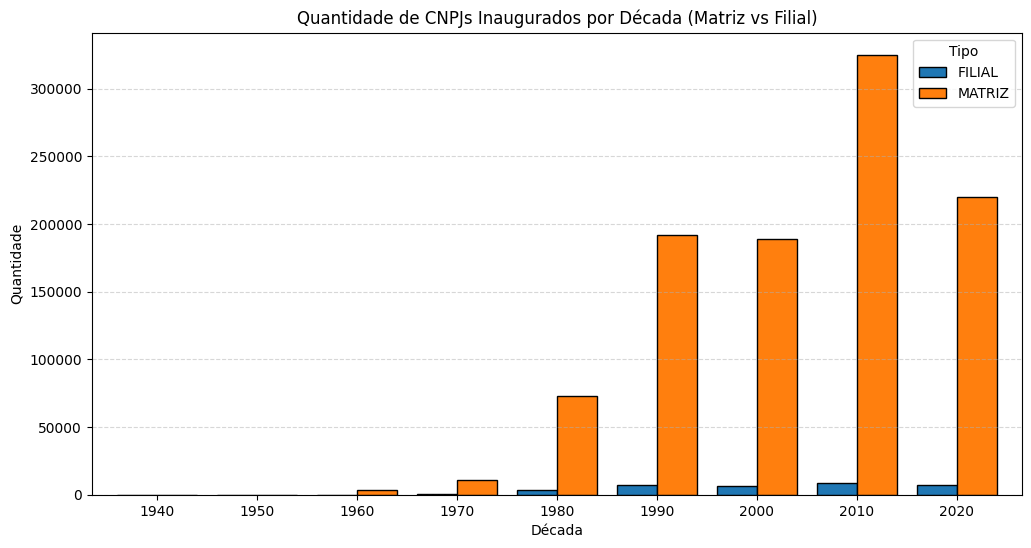

In [18]:
# O pandas facilita muito plotar pivot tables diretamente
ax1 = pivot_qtd.plot(kind='bar', figsize=(12, 6), width=0.8, edgecolor='black', rot=0)
plt.title('Quantidade de CNPJs Inaugurados por Década (Matriz vs Filial)')
plt.xlabel('Década')
plt.ylabel('Quantidade')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Tipo')
plt.show()

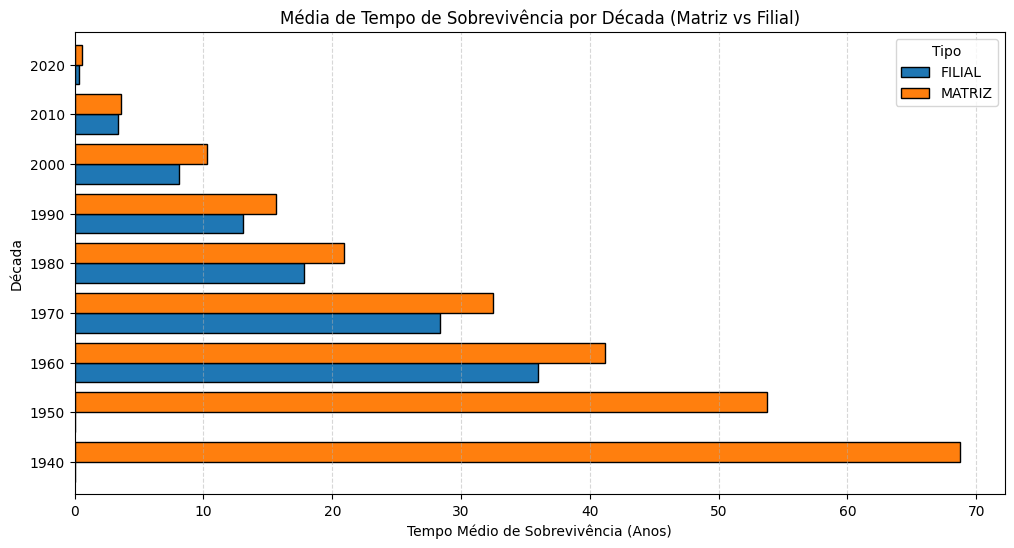

In [19]:
# --- Passo 5: Gráfico Média Sobrevivência (Barras Horizontais Agrupadas) ---
ax2 = pivot_media.plot(kind='barh', figsize=(12, 6), width=0.8, edgecolor='black')
plt.title('Média de Tempo de Sobrevivência por Década (Matriz vs Filial)')
plt.xlabel('Tempo Médio de Sobrevivência (Anos)')
plt.ylabel('Década')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.legend(title='Tipo')
plt.show()

#### Prévia - Cohort

In [20]:
"""
df = df_estabelecimento_filter.copy()

df["data_abertura"] = pd.to_datetime(df["data_inicio_atividade"])
df["ano_mes_abertura"] = df["data_abertura"].dt.to_period("M")

df["data_encerramento"] = pd.to_datetime(
    df["data_situacao"],
    errors="coerce"
)

df["data_encerramento"] = df["data_encerramento"].fillna(
    pd.to_datetime("2024-12-01")
)

df["idade_final_meses"] = (
    (df["data_encerramento"] - df["data_abertura"])
    / pd.Timedelta(days=30)
).astype(int)

df = df[df["idade_final_meses"] >= 0]
"""


'\ndf = df_estabelecimento_filter.copy()\n\ndf["data_abertura"] = pd.to_datetime(df["data_inicio_atividade"])\ndf["ano_mes_abertura"] = df["data_abertura"].dt.to_period("M")\n\ndf["data_encerramento"] = pd.to_datetime(\n    df["data_situacao"],\n    errors="coerce"\n)\n\ndf["data_encerramento"] = df["data_encerramento"].fillna(\n    pd.to_datetime("2024-12-01")\n)\n\ndf["idade_final_meses"] = (\n    (df["data_encerramento"] - df["data_abertura"])\n    / pd.Timedelta(days=30)\n).astype(int)\n\ndf = df[df["idade_final_meses"] >= 0]\n'

In [21]:
"""
df["empresa"] = 1

df_expanded = (
    df
    .loc[df.index.repeat(df["idade_final_meses"] + 1)]
    .assign(
        idade_meses=lambda x: x.groupby(level=0).cumcount()
    )
)
"""

'\ndf["empresa"] = 1\n\ndf_expanded = (\n    df\n    .loc[df.index.repeat(df["idade_final_meses"] + 1)]\n    .assign(\n        idade_meses=lambda x: x.groupby(level=0).cumcount()\n    )\n)\n'

In [22]:
"""
cohort = (
    df_expanded
    .groupby(["ano_mes_abertura", "idade_meses"])
    .agg(empresas_ativas=("empresa", "sum"))
    .reset_index()
)

cohort_pivot = cohort.pivot(
    index="ano_mes_abertura",
    columns="idade_meses",
    values="empresas_ativas"
)

cohort_retention = cohort_pivot.div(cohort_pivot[0], axis=0)
"""

'\ncohort = (\n    df_expanded\n    .groupby(["ano_mes_abertura", "idade_meses"])\n    .agg(empresas_ativas=("empresa", "sum"))\n    .reset_index()\n)\n\ncohort_pivot = cohort.pivot(\n    index="ano_mes_abertura",\n    columns="idade_meses",\n    values="empresas_ativas"\n)\n\ncohort_retention = cohort_pivot.div(cohort_pivot[0], axis=0)\n'

In [23]:
"""
cohort_retention_plot = cohort_retention.loc["2010-01":]
cohort_retention_plot = cohort_retention_plot.loc[:, :120]
cohort_retention_plot = cohort_retention_plot.dropna(thresh=3)
"""

'\ncohort_retention_plot = cohort_retention.loc["2010-01":]\ncohort_retention_plot = cohort_retention_plot.loc[:, :120]\ncohort_retention_plot = cohort_retention_plot.dropna(thresh=3)\n'

In [24]:
"""
plt.figure(figsize=(16, 8))

sns.heatmap(
    cohort_retention_plot,
    cmap="Blues",
    vmin=0,
    vmax=1,
    mask=cohort_retention_plot.isna()
)

plt.title("Cohort de Retenção — Varejo de Material de Construção")
plt.xlabel("Meses desde abertura")
plt.ylabel("Mês de abertura")
plt.show()
"""

'\nplt.figure(figsize=(16, 8))\n\nsns.heatmap(\n    cohort_retention_plot,\n    cmap="Blues",\n    vmin=0,\n    vmax=1,\n    mask=cohort_retention_plot.isna()\n)\n\nplt.title("Cohort de Retenção — Varejo de Material de Construção")\nplt.xlabel("Meses desde abertura")\nplt.ylabel("Mês de abertura")\nplt.show()\n'

In [25]:
cohort_retention

NameError: name 'cohort_retention' is not defined